In [2]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model import LstmForecastUnivariate
from ts.plot import Plot

# Training Data

In [2]:
n = 21500
trainN = 21000
seqLength = 500
numSeqPlot = 5

trainData, testData = Utility.trainTestSplit(
    StandardGenerator('long_term').generate(n),
    trainN
)

In [3]:
trainSequences = Utility.breakSeq(trainData, seqLength=seqLength)

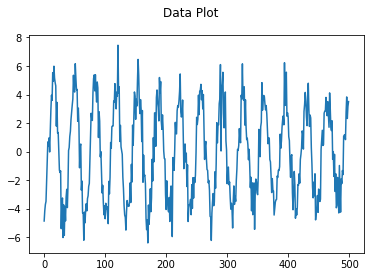

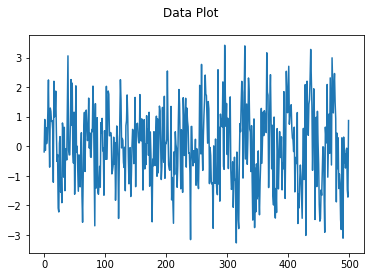

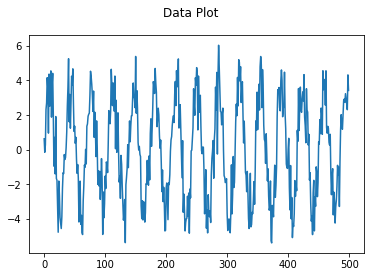

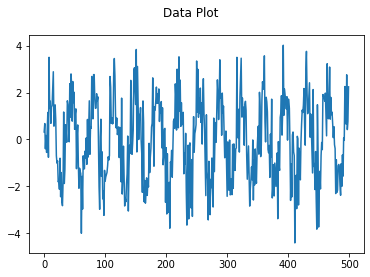

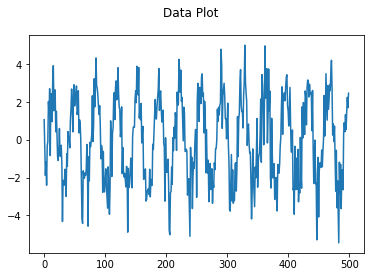

In [4]:
for i in range(numSeqPlot):
    Plot.plotDataCols(trainSequences[
        np.random.randint(0, len(trainSequences))
    ])

# Trial 1

In [5]:
model = LstmForecastUnivariate(
    forecastHorizon=1,
    stateSize=20,
    activation='tanh',
    numRnnLayers=2
)

model.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 20)          1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
dense (Dense)                (None, None, 1)           21        
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [6]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=35,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.07,
            15,
            0.97
        )
    )
)

Epoch 1/35
42/42 [==============================] - 8s 184ms/step - loss: 2.2434
Epoch 2/35
42/42 [==============================] - 7s 178ms/step - loss: 1.7174
Epoch 3/35
42/42 [==============================] - 7s 178ms/step - loss: 1.4861
Epoch 4/35
42/42 [==============================] - 8s 179ms/step - loss: 1.3406
Epoch 5/35
42/42 [==============================] - 7s 177ms/step - loss: 1.2657
Epoch 6/35
42/42 [==============================] - 7s 178ms/step - loss: 1.2698
Epoch 7/35
42/42 [==============================] - 7s 176ms/step - loss: 1.2652
Epoch 8/35
42/42 [==============================] - 8s 181ms/step - loss: 1.2618
Epoch 9/35
42/42 [==============================] - 8s 179ms/step - loss: 1.2829
Epoch 10/35
42/42 [==============================] - 8s 179ms/step - loss: 1.2478
Epoch 11/35
42/42 [==============================] - 7s 178ms/step - loss: 1.2235
Epoch 12/35
42/42 [==============================] - 8s 179ms/step - loss: 1.1989
Epoch 13/35
42/42 [======

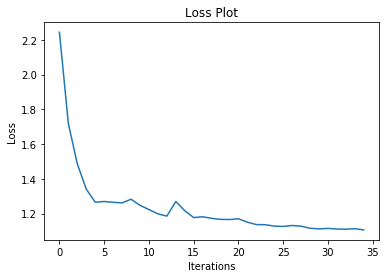

In [7]:
Plot.plotLoss(loss)

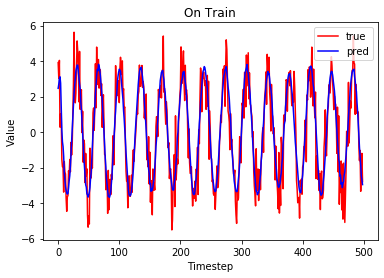

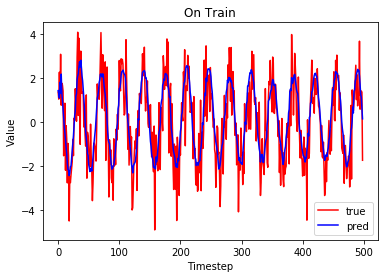

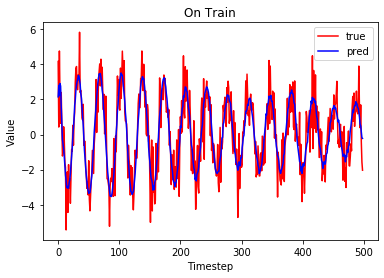

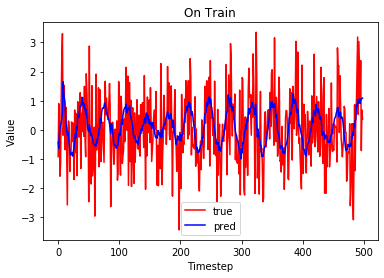

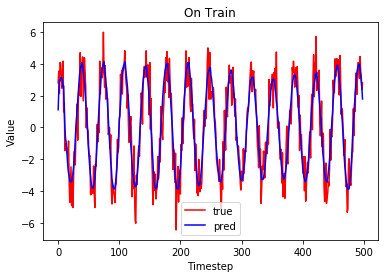

In [8]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

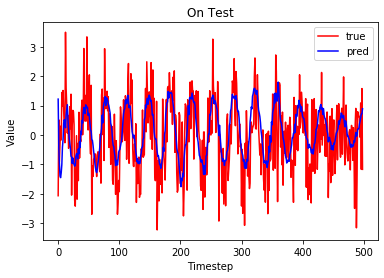

In [9]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Trial 2

In [10]:
model = LstmForecastUnivariate(
    forecastHorizon=1,
    stateSize=50,
    activation='tanh',
    numRnnLayers=3
)

model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 50)          20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 50)          20200     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=15,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            20,
            0.96
        )
    )
)

Epoch 1/15
42/42 [==============================] - 13s 301ms/step - loss: 1.9795
Epoch 2/15
42/42 [==============================] - 15s 346ms/step - loss: 1.4510
Epoch 3/15
42/42 [==============================] - 13s 312ms/step - loss: 1.3435
Epoch 4/15
42/42 [==============================] - 12s 285ms/step - loss: 1.2445
Epoch 5/15
42/42 [==============================] - 12s 276ms/step - loss: 1.2203
Epoch 6/15
42/42 [==============================] - 12s 286ms/step - loss: 1.2825
Epoch 7/15
42/42 [==============================] - 11s 272ms/step - loss: 1.2284
Epoch 8/15
42/42 [==============================] - 12s 281ms/step - loss: 1.2096
Epoch 9/15
42/42 [==============================] - 12s 275ms/step - loss: 1.2083
Epoch 10/15
42/42 [==============================] - 12s 297ms/step - loss: 1.2246
Epoch 11/15
42/42 [==============================] - 12s 296ms/step - loss: 1.2153
Epoch 12/15
42/42 [==============================] - 12s 288ms/step - loss: 1.2211
Epoch 13/15
4

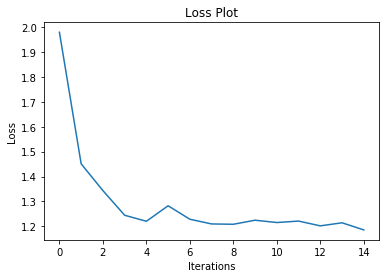

In [12]:
Plot.plotLoss(loss)

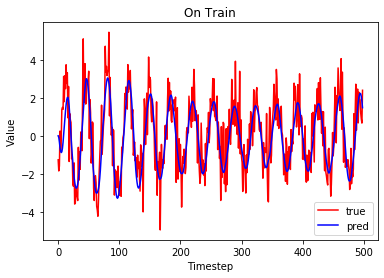

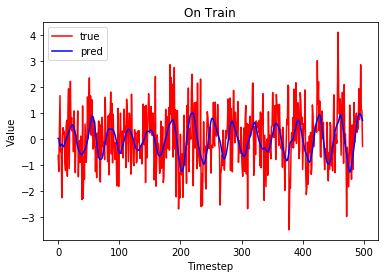

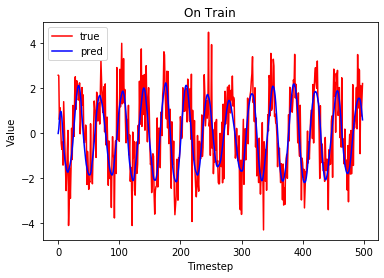

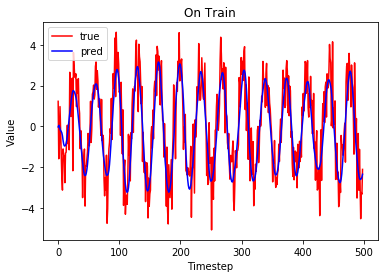

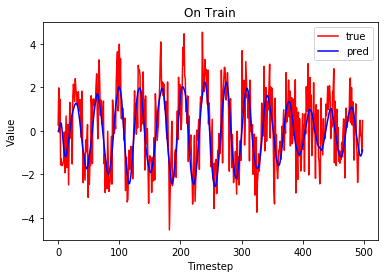

In [13]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

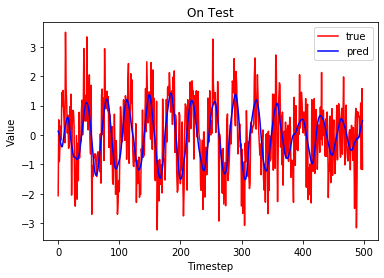

In [14]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Trial 3

In [15]:
model = LstmForecastUnivariate(
    forecastHorizon=1,
    stateSize=100,
    activation='tanh',
    numRnnLayers=2
)

model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 100)         40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 100)         80400     
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=20,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            20,
            0.97
        )
    )
)

Epoch 1/20
42/42 [==============================] - 8s 194ms/step - loss: 1.7761
Epoch 2/20
42/42 [==============================] - 8s 196ms/step - loss: 1.3287
Epoch 3/20
42/42 [==============================] - 8s 199ms/step - loss: 1.3168
Epoch 4/20
42/42 [==============================] - 8s 196ms/step - loss: 1.3559
Epoch 5/20
42/42 [==============================] - 8s 197ms/step - loss: 1.3403
Epoch 6/20
42/42 [==============================] - 8s 197ms/step - loss: 1.4086
Epoch 7/20
42/42 [==============================] - 8s 196ms/step - loss: 1.2551
Epoch 8/20
42/42 [==============================] - 9s 205ms/step - loss: 1.2320
Epoch 9/20
42/42 [==============================] - 9s 204ms/step - loss: 1.2819
Epoch 10/20
42/42 [==============================] - 8s 201ms/step - loss: 1.2170
Epoch 11/20
42/42 [==============================] - 9s 204ms/step - loss: 1.2478
Epoch 12/20
42/42 [==============================] - 9s 205ms/step - loss: 1.2409
Epoch 13/20
42/42 [======

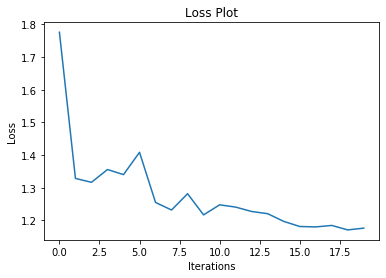

In [17]:
Plot.plotLoss(loss)

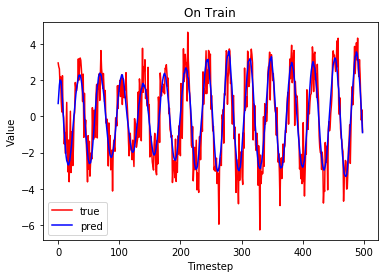

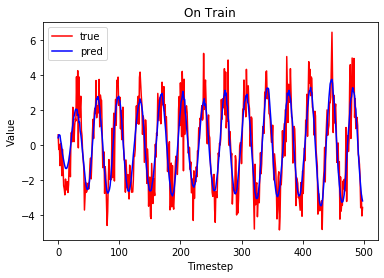

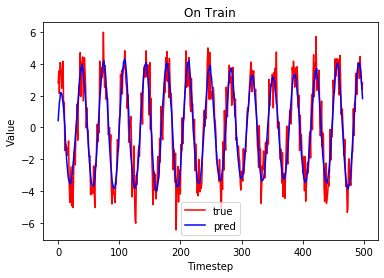

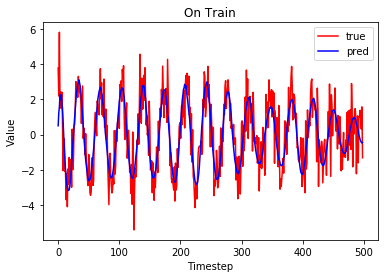

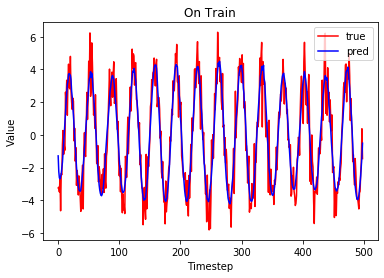

In [18]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

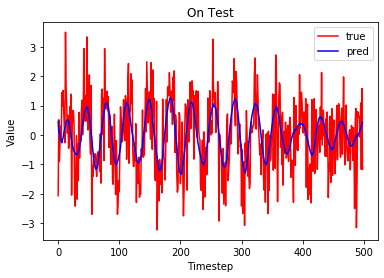

In [19]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Train Best

In [20]:
model = LstmForecastUnivariate(
    forecastHorizon=1,
    stateSize=120,
    activation='tanh',
    numRnnLayers=3
)

model.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 120)         58560     
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 120)         115680    
_________________________________________________________________
lstm_9 (LSTM)                (None, None, 120)         115680    
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           121       
Total params: 290,041
Trainable params: 290,041
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=20,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.04,
            40,
            0.98
        )
    )
)

Epoch 1/20
42/42 [==============================] - 13s 311ms/step - loss: 5.6725
Epoch 2/20
42/42 [==============================] - 16s 375ms/step - loss: 4.2187
Epoch 3/20
42/42 [==============================] - 18s 418ms/step - loss: 3.5262
Epoch 4/20
42/42 [==============================] - 18s 424ms/step - loss: 2.8404
Epoch 5/20
42/42 [==============================] - 19s 445ms/step - loss: 2.5480
Epoch 6/20
42/42 [==============================] - 19s 446ms/step - loss: 2.5356
Epoch 7/20
42/42 [==============================] - 17s 413ms/step - loss: 2.2387
Epoch 8/20
42/42 [==============================] - 16s 388ms/step - loss: 2.5418
Epoch 9/20
42/42 [==============================] - 16s 387ms/step - loss: 2.5149
Epoch 10/20
42/42 [==============================] - 16s 379ms/step - loss: 2.3494
Epoch 11/20
42/42 [==============================] - 16s 385ms/step - loss: 2.3788
Epoch 12/20
42/42 [==============================] - 16s 390ms/step - loss: 2.5205
Epoch 13/20
4

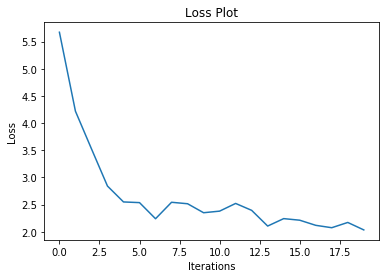

In [22]:
Plot.plotLoss(loss)

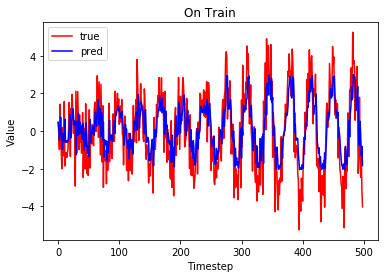

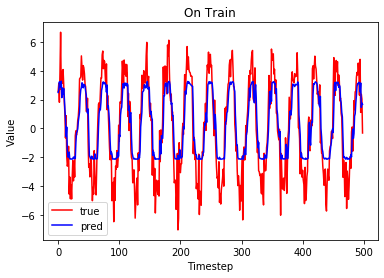

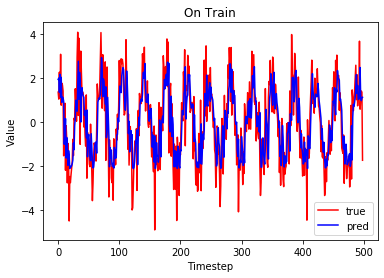

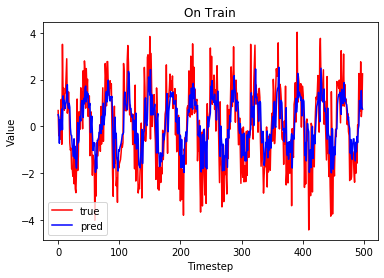

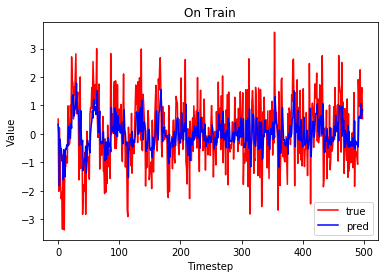

In [23]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

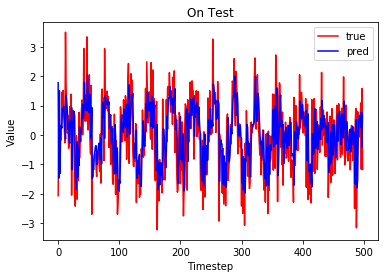

In [24]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')